<a href="https://colab.research.google.com/github/Ravindi24/DS_datatry/blob/main/TwitterSentiment_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP - Sentiment analysis using Twitter**

Import Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

Loading the dataset

In [54]:
# Import training dataset
train_path="/content/drive/MyDrive/ML_data3/Twitter_Sentiments.csv"
df=pd.read_csv(train_path)
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


**pre-prosessing**

In [56]:
# remove pattern in the input text
def remove_pattern(input_txt,pattern):
  r = re.findall(pattern,input_txt)
  for word in r:
    input_txt = re.sub(word,"",input_txt)
  return input_txt

In [57]:
# remove twitter handles (@user)
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [58]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [59]:
# remove special charactors, numbers and punctuations
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [60]:
# remove short words
df['clean_tweet']=df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
# split all the words using " " and if word length is >3 ,add them to string x
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [61]:
# individual word considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

In [62]:
# stem the words (narrow down the similar words into sigle word- ex: fight, fighter,fighting -->fight)                x is the entire row
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [63]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]= " ".join(tokenized_tweet[i])

df['clean_tweet']=tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


In [64]:
# remove 4th row
df.drop(3, inplace=True)
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fare talk befor they leave. chao di...


**Exploratory data analysis**

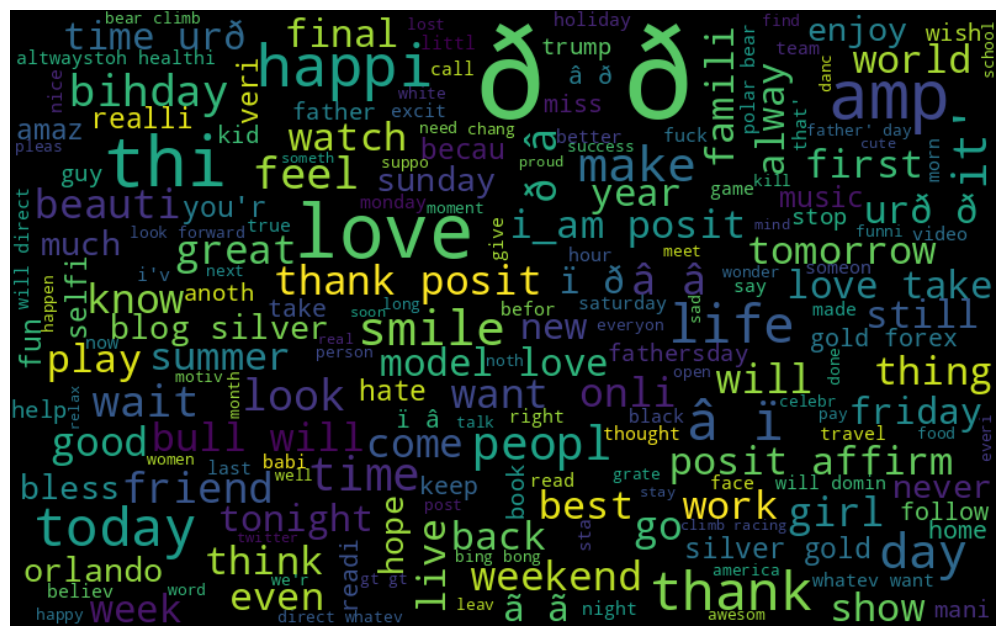

In [65]:
# visualize frequent words

# combine all the words in a single sentence
all_words = " ".join([sentence for sentence in df['clean_tweet']])

!pip install wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500, random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# bigger the word, more frequently it occurs

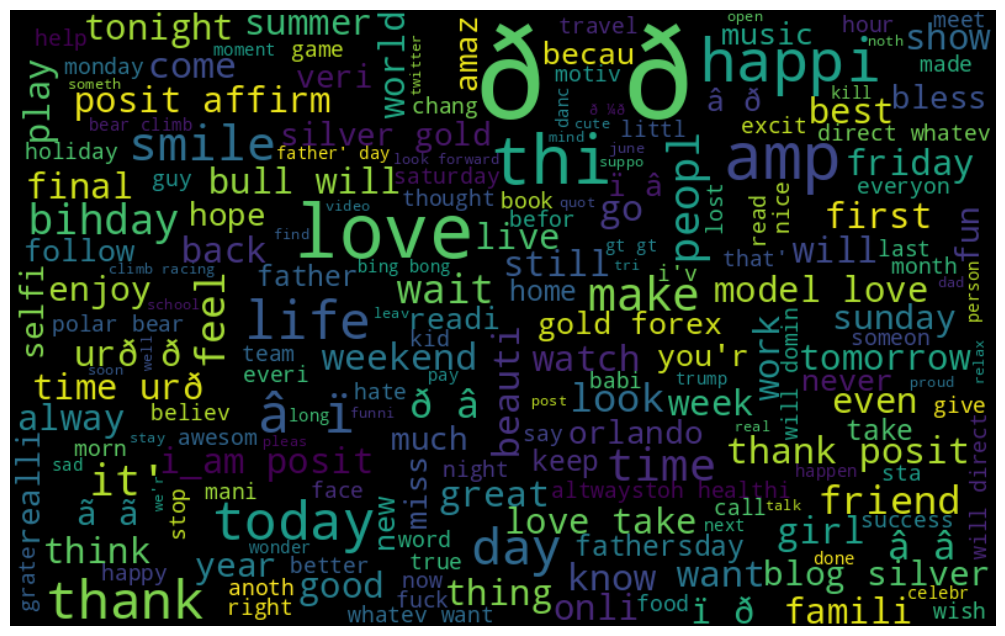

In [66]:
# frequent words visualization for positive
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500, random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

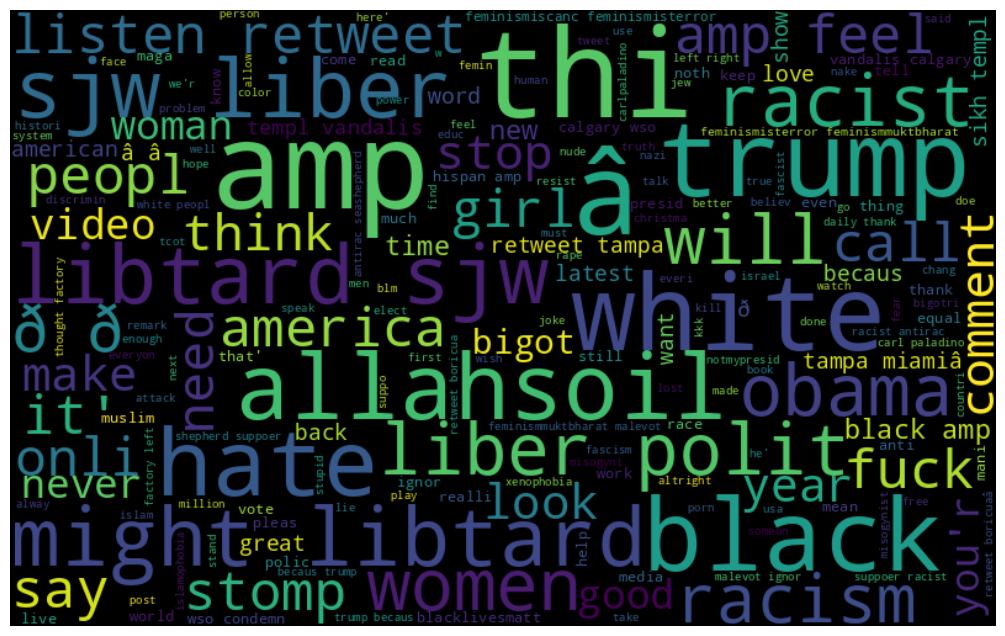

In [67]:
# frequent words visualization for negative
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500, random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
# extract the hash-tag
def hashtag_extract(tweets):
  hashtags=[]
  # loop words in the tweet
  for tweet in tweets:
    ht = re.findall(r"#(\w+)",tweet)
    hashtags.append(ht)
  return hashtags

In [70]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [72]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['motiv'], ['allshowandnogo']]

In [73]:
# unnest list
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])

In [74]:
ht_positive[:5] # all things are in the one list

['run', 'lyft', 'disapoint', 'getthank', 'motiv']

In [75]:
# positive
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag':list(freq.keys()),
                  'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,motiv,195


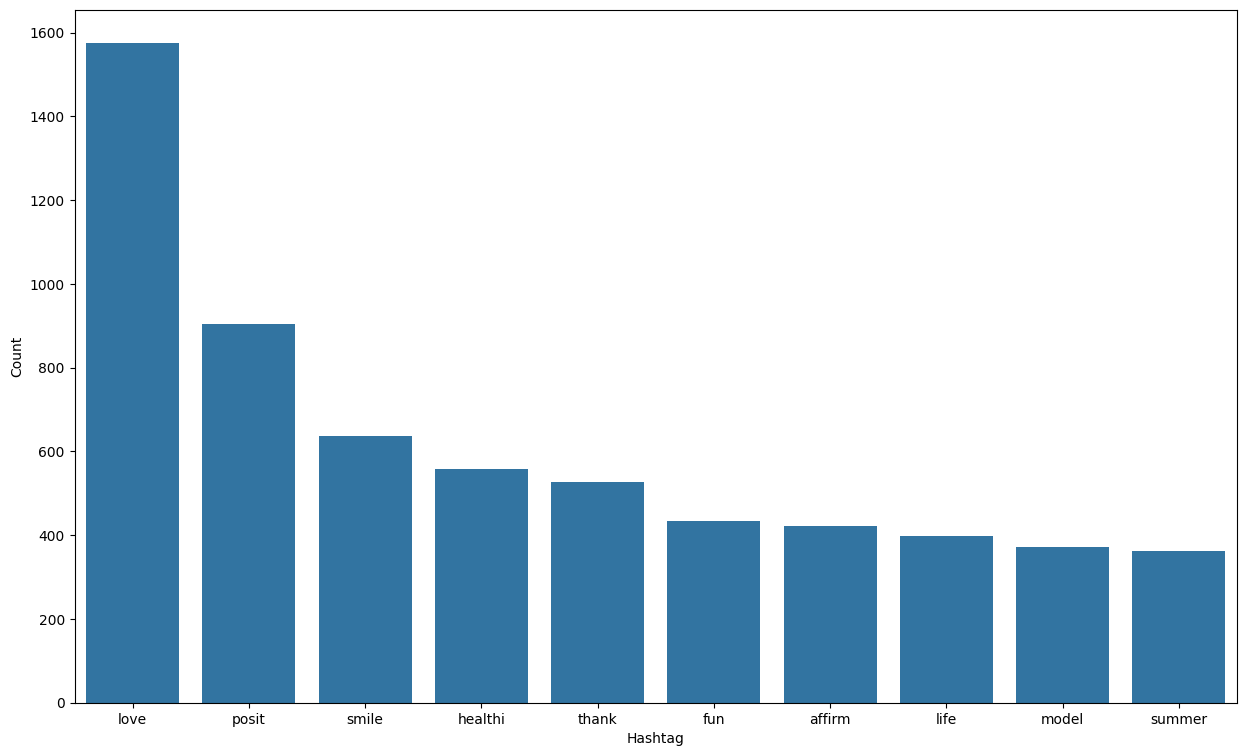

In [76]:
# select top 10 hashtags-  positive
d = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag',y='Count')
plt.show()

In [77]:
# negative
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag':list(freq.keys()),
                  'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


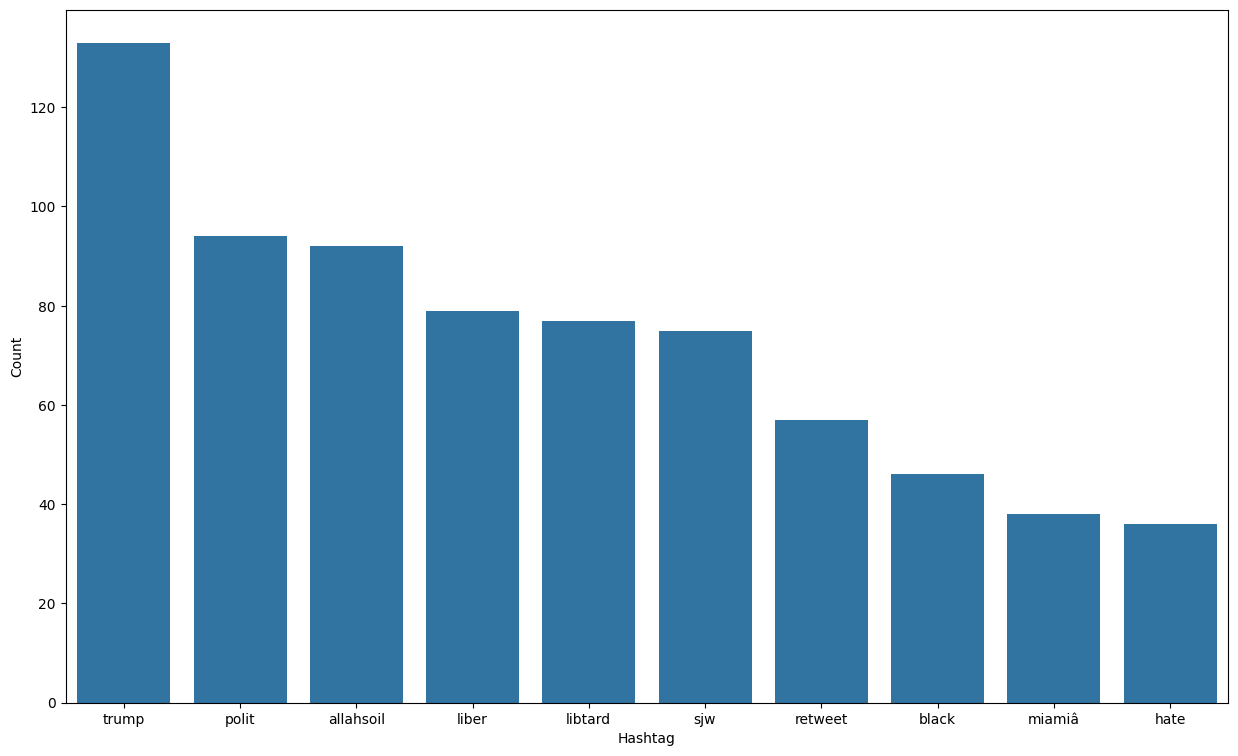

In [78]:
# select top 10 hashtags-  negative
d = d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag',y='Count')
plt.show()

Feature Extraction

In [79]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])
bow

<31961x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 123378 stored elements in Compressed Sparse Row format>

Slpiting

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bow, df['label'],random_state=42,test_size=0.25)

**Model Fitting**

**1) Logistic Regression**

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [82]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
pred1 = model1.predict(x_test)

In [83]:
f1_score(y_test,pred1)

0.5062344139650873

In [84]:
accuracy_score(y_test,pred1)

0.9504442497810036

Use probability to get outputs

In [87]:
pred11_prob = model1.predict_proba(x_test)
pred11 = pred11_prob[:,1]>=0.3
pred11 = pred11.astype(int)

f1_score(y_test,pred11)

0.5728848114169215

In [88]:
accuracy_score(y_test,pred11)

0.9475660117632336

Parameter tunning - logistic reg

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],    # l1=Lasso, l2=ridge
    'C': [0.001, 0.01, 0.1, 1, 10],          # inverse of regularization strength. Smaller values specify stronger regularization
    'solver': ['liblinear', 'saga'] ,         # used to optimize the logistic regression function
    'max_iter': [150,200, 250]               # maximum number of iterations taken for the solver to converge
}
grid_search = GridSearchCV(estimator=LogisticRegression(solver='lbfgs'), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
print("Best Parameters:", best_params)

Through hyper-parameter tuning, it gives Ridge as optimal

In [ ]:
best_model = grid_search.best_estimator_
pred1 = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred1)
print("Accuracy:", accuracy)

In [ ]:
f1_score(y_test,pred1)

**2) Random Forest**

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="gini",
                             max_depth=8,
                             min_samples_split=10,
                             random_state=5)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [92]:
pred2 = rf.predict(x_test)
pred2

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
f1_score(y_test,pred2)

0.07829181494661923

In [94]:
accuracy_score(y_test,pred2)

0.9351770742084845